# E1: Bag of Words Techniques

Up to this point, we've explored two types of methods for ASAG: Regular expressions matching algorithms and lexical overlap techniques. 

Both of these are efficient and easy to implement but have many lacking characteristics. Their main problem is that their **recall** scores are so low. The better versions have fairly high precision - from 40% (on 6 class) to 90% on 2 class. However, the low recall scores create a frustrating environment for quiz and test takers since this means many students actually correctly answer the question prompt but receive a failing score - this is not good. We would much rather have lower precision and higher recall to avoid frustration especially for self-study courses.

In this notebook we are interested in establishing a baseline for evaluating future models. In the previous notebook, we saw that raw overlap methods are in the general case too crude for establishing a baseline since they underperformed random chance.

Now we're going to extend our exploration using industry standard [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model) techniques. Many papers use the [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) as a baseline for evaluating the effectiveness of their semantic or vector spaced models and that's what we're going to attempt to do in this experiment.

In [7]:
import sys
import numpy as np
sys.path.append('../')
import libs.utils as utils
import libs.stats as stats
import libs.preprocessing as pp
import libs.bag_of_words as bow
from importlib import reload
import spacy
reload(bow)

<module 'libs.bag_of_words' from '../libs/bag_of_words.py'>

## E1.1 v2.0_en BoW N-Grams of Size n=1

[N-grams](https://en.wikipedia.org/wiki/N-gram) give us a way to look at some of the characteristics of a text beyond its simple BoW composition. In this first experiment we will ignore n-grams, however, and instead focus on purely words i.e. at [unigrams](http://www.yourdictionary.com/unigram) where N=1. In later experiments we'll look at [Bigrams](https://en.wikipedia.org/wiki/Bigram) and [Trigrams](https://en.wikipedia.org/wiki/Trigram) to see if adding in some syntactic structure into the BOW models improves said models.

### Techniques

1. Simple Raw Counts : Frequency counts
2. We will not be using more complicated models such as the **TF-IDF** in this experiment, that will come later. Right now we want to see how far we can get with frequency counts themselves.

In [5]:
# Load Dataset
df2_en = utils.load_dataframe(language='en', version=2)
print(len(df2_en))

nlp_en = spacy.load('en')

2442


In [14]:
reload(bow)
en_tokenizer = bow.create_bow_tokenizer(nlp_en)
e11_vec = bow.create_count_vectorizer(pp.EN_STOPS, en_tokenizer, ngram_range=(1,1))

e11_res = bow.execute_bow_model(df2_en, e11_vec)

/home/che/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Accuracy: 11.630%
Precision: 51.405%
Recall: 11.630%
F1-Measure: 15.051%
Pearson's R: 0.43
Cohen's Kappa: 0.01
RMSE: 2.62
MAE: 2.26
Y-True Mean: 4.15
Y-Pred Mean: 1.93
Y-True Std Deviation: 1.12
Y-Pred Std Deviation: 1.44


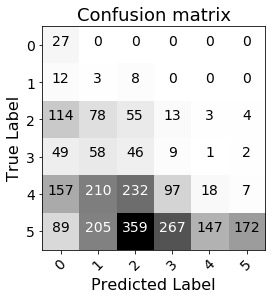

In [16]:
stats.print_big4(e11_res['y_true'], e11_res['y_pred'])
stats.print_stats(e11_res['y_true'], e11_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e11_res['y_true'], e11_res['y_pred']), classes=np.unique(e11_res['y_true']))

## E1.2 v2.0_en BoW Ngrams N=2

1. Attempt the above experiment with ngrams of n=1 and n=2

In [28]:
en_tokenizer = bow.create_bow_tokenizer(nlp_en)
e12_vec = bow.create_count_vectorizer(pp.EN_STOPS, en_tokenizer, ngram_range=(1,2))
e12_res = bow.execute_bow_model(df2_en, e12_vec)

/home/che/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Accuracy: 8.026%
Precision: 48.160%
Recall: 8.026%
F1-Measure: 10.788%
Pearson's R: 0.40
Cohen's Kappa: 0.01
RMSE: 3.03
MAE: 2.74
Y-True Mean: 4.15
Y-Pred Mean: 1.44
Y-True Std Deviation: 1.12
Y-Pred Std Deviation: 1.34


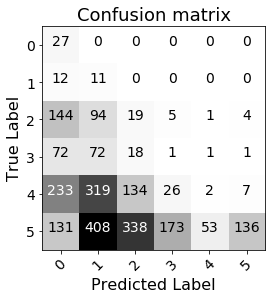

In [29]:
stats.print_big4(e12_res['y_true'], e12_res['y_pred'])
stats.print_stats(e12_res['y_true'], e12_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e12_res['y_true'], e12_res['y_pred']), classes=np.unique(e12_res['y_true']))

### E1.2: Summary

Its interesting that an n-gram size n=2 performed worst, but this does make sense. We are simply counting frequencies of matching pairs between student and model answers. It is less likely for instance that a student will match the phrase *"fast program"* than simply the words *"fast"* or *"program"*.

So post-hoc, this does make sense.

We could fix this by using multiple vectorization models, and weighting the results differently.

## E1.3 v2.0_en Dataset Multiple Overlapping Ngrams (N=1,2,3)

1. Use Different vectorization models and scoring schemes.

In [39]:
reload(bow)
e13_res = bow.execute_multiple_bow_models(df2_en, pp.EN_STOPS, en_tokenizer)

/home/che/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Accuracy: 17.486%
Precision: 50.225%
Recall: 17.486%
F1-Measure: 22.969%
Pearson's R: 0.42
Cohen's Kappa: 0.04
RMSE: 2.43
MAE: 2.01
Y-True Mean: 4.15
Y-Pred Mean: 2.25
Y-True Std Deviation: 1.12
Y-Pred Std Deviation: 1.60


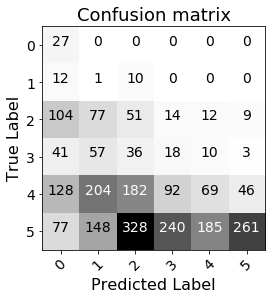

In [40]:
stats.print_big4(e13_res['y_true'], e13_res['y_pred'])
stats.print_stats(e13_res['y_true'], e13_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e13_res['y_true'], e13_res['y_pred']), classes=np.unique(e13_res['y_true']))

## E1.4 v2.0_en Pass / Fail

Accuracy: 49.386%
Precision: 86.311%
Recall: 49.386%
F1-Measure: 56.211%
Pearson's R: 0.22
Cohen's Kappa: 0.13
RMSE: 0.71
MAE: 0.51
Y-True Mean: 0.87
Y-Pred Mean: 0.39
Y-True Std Deviation: 0.34
Y-Pred Std Deviation: 0.49


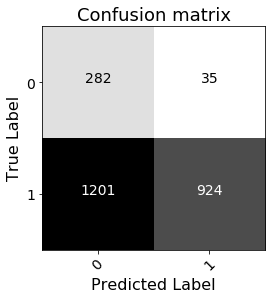

In [41]:
e14_y_true = e13_res['y_true'].copy()
e14_y_pred = e13_res['y_pred'].copy()

e14_y_true = utils.convert_to_pass_fail(e14_y_true)
e14_y_pred = utils.convert_to_pass_fail(e14_y_pred)

stats.print_big4(e14_y_true, e14_y_pred)
stats.print_stats(e14_y_true, e14_y_pred)
stats.plot_confusion_matrix(stats.cm(e14_y_true, e14_y_pred), classes=np.unique(e14_y_true))

## E1.5a v2.0_de German

In [46]:
# Load Dataset
df2_de = utils.load_dataframe(language='de', version=2)
print(len(df2_de))

nlp_de = spacy.load('de')

de_tokenizer = bow.create_bow_tokenizer(nlp_de)
e15_res = bow.execute_multiple_bow_models(df2_de, pp.DE_STOPS, de_tokenizer)

2442


/home/che/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Accuracy: 10.115%
Precision: 47.090%
Recall: 10.115%
F1-Measure: 14.042%
Pearson's R: 0.32
Cohen's Kappa: 0.02
RMSE: 3.14
MAE: 2.75
Y-True Mean: 4.15
Y-Pred Mean: 1.45
Y-True Std Deviation: 1.12
Y-Pred Std Deviation: 1.55


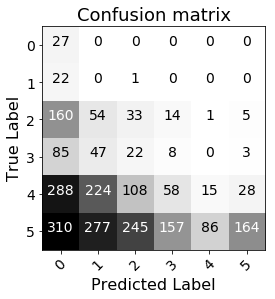

In [47]:
stats.print_big4(e15_res['y_true'], e15_res['y_pred'])
stats.print_stats(e15_res['y_true'], e15_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e15_res['y_true'], e15_res['y_pred']), classes=np.unique(e15_res['y_true']))

## E1.5b v2.0_de German Pass / Fail

Accuracy: 33.415%
Precision: 85.816%
Recall: 33.415%
F1-Measure: 37.379%
Pearson's R: 0.15
Cohen's Kappa: 0.06
RMSE: 0.82
MAE: 0.67
Y-True Mean: 0.87
Y-Pred Mean: 0.22
Y-True Std Deviation: 0.34
Y-Pred Std Deviation: 0.41


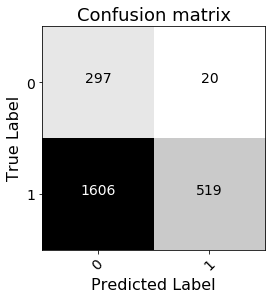

In [48]:
e15_y_true = e15_res['y_true'].copy()
e15_y_pred = e15_res['y_pred'].copy()

e15_y_true = utils.convert_to_pass_fail(e15_y_true)
e15_y_pred = utils.convert_to_pass_fail(e15_y_pred)

stats.print_big4(e15_y_true, e15_y_pred)
stats.print_stats(e15_y_true, e15_y_pred)
stats.plot_confusion_matrix(stats.cm(e15_y_true, e15_y_pred), classes=np.unique(e15_y_true))

## E1.6a v2.0_es Spanish

In [49]:
# Load Dataset
df2_es = utils.load_dataframe(language='es', version=2)
print(len(df2_es))

nlp_es = spacy.load('es')

es_tokenizer = bow.create_bow_tokenizer(nlp_es)
e16_res = bow.execute_multiple_bow_models(df2_es, pp.ES_STOPS, es_tokenizer)

2442


/home/che/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Accuracy: 17.690%
Precision: 49.763%
Recall: 17.690%
F1-Measure: 23.521%
Pearson's R: 0.40
Cohen's Kappa: 0.05
RMSE: 2.52
MAE: 2.08
Y-True Mean: 4.15
Y-Pred Mean: 2.18
Y-True Std Deviation: 1.12
Y-Pred Std Deviation: 1.64


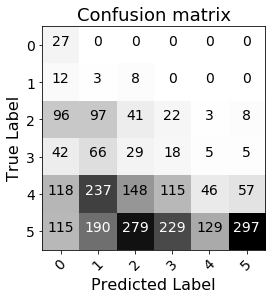

In [50]:
stats.print_big4(e16_res['y_true'], e16_res['y_pred'])
stats.print_stats(e16_res['y_true'], e16_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e16_res['y_true'], e16_res['y_pred']), classes=np.unique(e16_res['y_true']))

## E1.6b v2.0_es Spanish Pass / Fail

Accuracy: 48.526%
Precision: 86.389%
Recall: 48.526%
F1-Measure: 55.301%
Pearson's R: 0.22
Cohen's Kappa: 0.12
RMSE: 0.72
MAE: 0.51
Y-True Mean: 0.87
Y-Pred Mean: 0.38
Y-True Std Deviation: 0.34
Y-Pred Std Deviation: 0.49


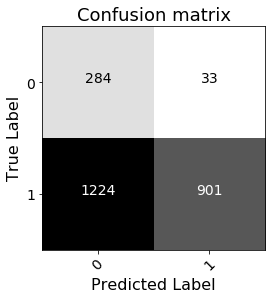

In [51]:
e16_y_true = e16_res['y_true'].copy()
e16_y_pred = e16_res['y_pred'].copy()

e16_y_true = utils.convert_to_pass_fail(e16_y_true)
e16_y_pred = utils.convert_to_pass_fail(e16_y_pred)

stats.print_big4(e16_y_true, e16_y_pred)
stats.print_stats(e16_y_true, e16_y_pred)
stats.plot_confusion_matrix(stats.cm(e16_y_true, e16_y_pred), classes=np.unique(e16_y_true))